In [3]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

In [4]:
tesla_data.reset_index(inplace=True)

In [5]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [14]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0"
}

html_data = requests.get(url, headers=headers).text

In [15]:
tables = pd.read_html(html_data)

C:\Users\T H I N  K P A D\AppData\Local\Temp\ipykernel_15780\3267145357.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


In [8]:
soup = BeautifulSoup(html_data, "html.parser")

In [17]:
tesla_revenue = tables[1]   # This is the Tesla Quarterly Revenue table
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\T H I N  K P A D\AppData\Local\Temp\ipykernel_15780\2793344960.py:3: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)


,Date,Revenue
55,2011-12-31,39
56,2011-09-30,58
57,2011-06-30,58
58,2011-03-31,49
59,2010-12-31,36


In [9]:
tables = soup.find_all("table")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 0:
                date = col[0].text
                revenue = col[1].text
                tesla_revenue = pd.concat(
                    [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                    ignore_index=True
                )

In [12]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)
tesla_revenue.dropna(inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\T H I N  K P A D\AppData\Local\Temp\ipykernel_15780\237287659.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)


In [13]:
tesla_revenue.tail()

,Date,Revenue


In [18]:
gme_data = yf.Ticker("GME").history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [19]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0"
}

html_data = requests.get(url, headers=headers).text

tables = pd.read_html(html_data)

gme_revenue = tables[1]

gme_revenue.columns = ["Date", "Revenue"]

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)

gme_revenue.dropna(inplace=True)

gme_revenue.tail()

<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\T H I N  K P A D\AppData\Local\Temp\ipykernel_15780\1817847903.py:15: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)
C:\Users\T H I N  K P A D\AppData\Local\Temp\ipykernel_15780\1817847903.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


,Date,Revenue
54,2012-01-31,3579
55,2011-10-31,1947
56,2011-07-31,1744
57,2011-04-30,2281
58,2011-01-31,3693


In [21]:
!pip install plotly

import plotly.graph_objects as go

def make_graph(stock_data, title):
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=stock_data["Date"],
            y=stock_data["Close"],
            name="Close Price"
        )
    )

    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis_title="Stock Price (USD)",
        showlegend=True
    )

    fig.show()

make_graph(tesla_data, "Tesla Stock Price Over Time")

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 2.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.9 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.9 MB 2.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.9 MB 2.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.9 MB 2.8 MB/s eta 0:00:03
   --------------- ------------------------ 3.9/9.9 MB 2.9 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.9 MB 2.9 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.9 MB 2.9 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.9 MB 2.8 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.9 MB 2.8 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.9 MB 2.8 MB/s eta 0:00:02
   -----------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import plotly.graph_objects as go
pio.renderers.default = "iframe"

In [23]:
def make_graph(stock_data, title):
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=stock_data["Date"],
            y=stock_data["Close"],
            name="Close Price"
        )
    )

    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis_title="Stock Price (USD)",
        showlegend=True
    )

    fig.show()

make_graph(tesla_data, "Tesla Stock Price Over Time")

In [26]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [27]:
make_graph(tesla_data, "Tesla Stock Price Over Time")

In [28]:
def make_graph(stock_data, title):
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=stock_data["Date"],
            y=stock_data["Close"],
            name="Close Price"
        )
    )

    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis_title="Stock Price (USD)",
        showlegend=True
    )

    fig.show()

In [29]:
make_graph(gme_data, "GameStop Stock Price Over Time")

In [30]:
!pip install yfinance
import yfinance as yf
import pandas as pd


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [33]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [34]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [35]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [36]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, "html.parser")

In [37]:
tables = soup.find_all("table")
tesla_table = tables[1]

In [42]:
tesla_revenue["Revenue"] = (tesla_revenue["Revenue"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

In [43]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [45]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [46]:
import pandas as pd

tables = pd.read_html(html_data)
len(tables)

6

In [48]:
import pandas as pd

tables = pd.read_html(html_data)

for i, t in enumerate(tables):
    print(i, [str(c) for c in t.columns])

0 ['Tesla Annual Revenue (Millions of US $)', 'Tesla Annual Revenue (Millions of US $).1']
1 ['Tesla Quarterly Revenue (Millions of US $)', 'Tesla Quarterly Revenue (Millions of US $).1']
2 ['Sector', 'Industry', 'Market Cap', 'Revenue']
3 ['Stock Name', 'Country', 'Market Cap', 'PE Ratio']
4 ['Link Preview', 'HTML Code (Click to Copy)']
5 ['Link Preview', 'HTML Code (Click to Copy)']


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date columns are datetime
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Ensure numeric columns
tesla_data["Close"] = tesla_data["Close"].astype(float)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

In [55]:
def make_graph(stock_data, revenue_data, stock):
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock Price
    axes[0].plot(
        stock_data_specific.Date,
        stock_data_specific.Close,
        label="Share Price"
    )
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")
    axes[0].legend()

    # Revenue
    axes[1].plot(
        revenue_data_specific.Date,
        revenue_data_specific.Revenue,
        label="Revenue"
    )
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

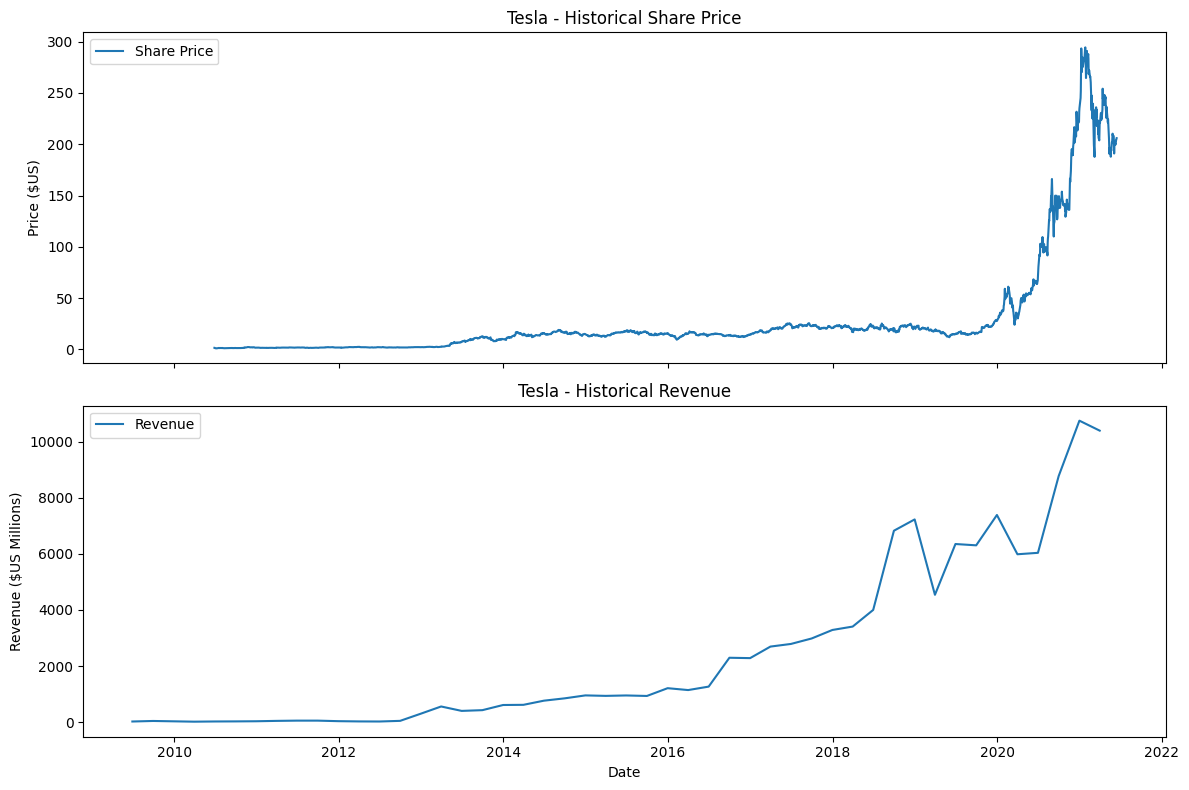

In [56]:
make_graph(tesla_data, tesla_revenue, "Tesla")

In [57]:
import requests

url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.htm"
html_data_2 = requests.get(url2).text

In [60]:
!pip install html5lib lxml


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from bs4 import BeautifulSoup
import pandas as pd

In [65]:
print(type(html_data_2))
print(len(html_data_2))
print(html_data_2[:300])

<class 'str'>
348
<?xml version="1.0" encoding="UTF-8" standalone="yes"?><Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Resource>/cf-courses-data/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.htm</Resource><RequestId>8cc55800-da5b-45aa-966c-87c332d48ec8</Reques


In [66]:
import requests

base = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/"

candidates = [
    "stock.html",
    "stock.htm",
    "gme.htm",
    "gme.html",
    "gme_revenue.htm",
    "gme_revenue.html",
    "gamestop_revenue.htm",
    "gamestop_revenue.html"
]

for f in candidates:
    r = requests.get(base + f)
    ok = (r.status_code == 200) and ("<html" in r.text.lower())
    print(f, r.status_code, "HTML" if ok else r.text[:40])

stock.html 200 HTML
stock.htm 404 <?xml version="1.0" encoding="UTF-8" sta
gme.htm 404 <?xml version="1.0" encoding="UTF-8" sta
gme.html 404 <?xml version="1.0" encoding="UTF-8" sta
gme_revenue.htm 404 <?xml version="1.0" encoding="UTF-8" sta
gme_revenue.html 404 <?xml version="1.0" encoding="UTF-8" sta
gamestop_revenue.htm 404 <?xml version="1.0" encoding="UTF-8" sta
gamestop_revenue.html 404 <?xml version="1.0" encoding="UTF-8" sta


In [67]:
html_data_2 = requests.get(base + "THE_CORRECT_FILE").text

In [68]:
import requests

base = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/"
html_data_2 = requests.get(base + "stock.html").text

In [69]:
!pip install lxml



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [72]:
import pandas as pd

tables = pd.read_html(html_data)

# From your earlier output, Tesla Quarterly Revenue is tables[1]
tesla_revenue = tables[1].copy()

# Make sure column names match IBM requirement
tesla_revenue.columns = ["Date", "Revenue"]

In [73]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)

<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:1: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\T H I N  K P A D\AppData\Local\Temp\ipykernel_15780\734894087.py:1: SyntaxWarning:

invalid escape sequence '\$'



In [74]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

In [75]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [76]:
import yfinance as yf

gme = yf.Ticker("GME")

In [77]:
gme_data = gme.history(period="max")

In [78]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [79]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

In [80]:
import pandas as pd

tables = pd.read_html(html_data_2)

# GameStop Quarterly Revenue table is the FIRST table
gme_revenue = tables[0].copy()

# Rename columns to match IBM requirement
gme_revenue.columns = ["Date", "Revenue"]

In [81]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)

<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:1: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\T H I N  K P A D\AppData\Local\Temp\ipykernel_15780\3067572666.py:1: SyntaxWarning:

invalid escape sequence '\$'



In [84]:
import pandas as pd

tables = pd.read_html(html_data_2)

for i, t in enumerate(tables):
    print(i, t.columns.tolist())

0 ['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1']
1 ['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1']
2 ['Sector', 'Industry', 'Market Cap', 'Revenue']
3 ['Stock Name', 'Country', 'Market Cap', 'PE Ratio']
4 ['Link Preview', 'HTML Code (Click to Copy)']
5 ['Link Preview', 'HTML Code (Click to Copy)']


In [85]:
gme_revenue = tables[1].copy()

In [86]:
gme_revenue.columns = ["Date", "Revenue"]

In [87]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\\$", "", regex=True)

In [88]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

In [89]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


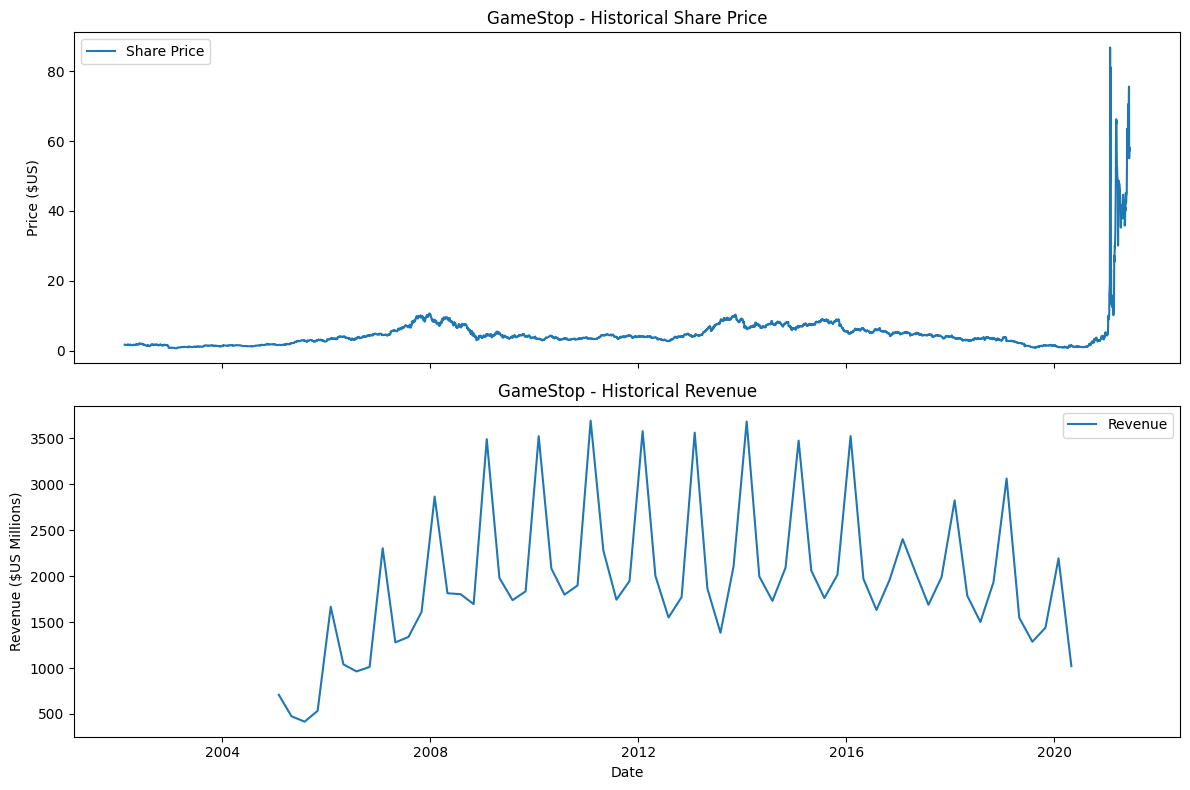

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date columns are datetime
gme_data["Date"] = pd.to_datetime(gme_data["Date"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Ensure numeric columns
gme_data["Close"] = gme_data["Close"].astype(float)
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

def make_graph(stock_data, revenue_data, stock):

    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock Price
    axes[0].plot(
        stock_data_specific.Date,
        stock_data_specific.Close,
        label="Share Price"
    )
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")
    axes[0].legend()

    # Revenue
    axes[1].plot(
        revenue_data_specific.Date,
        revenue_data_specific.Revenue,
        label="Revenue"
    )
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

make_graph(gme_data, gme_revenue, "GameStop")